In this code, a model example of how to use both classical DFT calculations and quantum computing based environments to calculate the aging of Dibenzothiophene, a representative molecule for resins in the SARA colloidal mixture of bitumen is given.

Authors: Surbhi Singla, Anusha Agarwal, Neha Chandran, Sophia Hou
GIC Academic Cohort MITRE Challenge: Thomas Jefferson High School Science/Tech Quantum Research Lab

For effective implementation or adaptation of this notebook, there are a couple options:
1. Use a cloud-based Jupyter environment, all packages should install well assuming correct versions, code should run fine
2. Use the .chk, .npz, .xyz files that were made using pyscf calculations and enter straight into the quantum workflow
3. If using Linux systems, run the notebook as is (classical set-up is time-intensive)
4. If using Windows/Apple, use systems like WSL to get Ubuntu, set up a virtual environment, and get pyscf and rd-kit through the venv

The notebook below is compatible with options 3 and 4, we ran it through a WSL venv

THIS CODE WORKS BEST IN Python 3.10.18. LATER VERSIONS DO NOT HAVE COMPATIBILITY WITH PACKAGES USED.

In [27]:
%pip install "numpy<2.0"
%pip install rdkit-pypi pyscf scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdmolfiles import MolToXYZBlock
from pyscf import gto, dft
from scipy.optimize import minimize
import numpy as np

#Creating an RD-Kit molecule geometry from SMILES geometry (PubChem)
smiles = "C1=CC=C2C(=C1)C3=CC=CC=C3S2"
mol = Chem.AddHs(Chem.MolFromSmiles(smiles))
AllChem.EmbedMolecule(mol, AllChem.ETKDGv3())
AllChem.MMFFOptimizeMolecule(mol)

#Extracting atomic symbols and coordinates
conf = mol.GetConformer()
atoms = [atom.GetSymbol() for atom in mol.GetAtoms()]
coords = np.array(conf.GetPositions())

print(coords)

[[-3.06436721e+00 -8.98853111e-01  1.71619654e-01]
 [-3.49993319e+00  3.87342336e-01 -1.08270079e-01]
 [-2.57949823e+00  1.41471408e+00 -3.22829794e-01]
 [-1.20126881e+00  1.12714706e+00 -2.51118632e-01]
 [-7.32846424e-01 -1.57123349e-01  2.86044328e-02]
 [-1.69624287e+00 -1.17846334e+00  2.41537900e-01]
 [ 7.17905314e-01 -2.11247414e-01  5.05735247e-02]
 [ 1.59566027e+00 -1.30127666e+00  2.91390343e-01]
 [ 2.98229929e+00 -1.12442997e+00  2.63226888e-01]
 [ 3.52073116e+00  1.25425080e-01 -1.93098752e-03]
 [ 2.68629720e+00  1.21826930e+00 -2.43057882e-01]
 [ 1.28893895e+00  1.03424827e+00 -2.13388860e-01]
 [ 9.05302230e-02  2.23192442e+00 -4.79665432e-01]
 [-3.78682373e+00 -1.69419134e+00  3.37633211e-01]
 [-4.56499956e+00  6.00194167e-01 -1.61661176e-01]
 [-2.92271869e+00  2.42198751e+00 -5.42078141e-01]
 [-1.37122654e+00 -2.19208809e+00  4.61987680e-01]
 [ 1.18951562e+00 -2.28762029e+00  5.00773525e-01]
 [ 3.63815699e+00 -1.97117545e+00  4.50150042e-01]
 [ 4.59982106e+00  2.58280859e-

In [29]:
#First file-saving checkpoint
with open("dibenzothiophene_mmff.xyz", "w") as f:
    f.write(f"{len(atoms)}\nDibenzothiophene MMFF geometry\n")
    for atom, (x, y, z) in zip(atoms, coords):
        f.write(f"{atom} {x:.6f} {y:.6f} {z:.6f}\n")

In [30]:
#Building molecule in PySCF
from pyscf import gto, dft

atom_str = "\n".join(f"{el} {x:.6f} {y:.6f} {z:.6f}" for el, (x, y, z) in zip(atoms, coords))

mol_pyscf = gto.Mole()
mol_pyscf.atom = atom_str
mol_pyscf.basis = "def2-SVP"

#def2-SVP is a very computationally heavy basis
#We used it for our processing to get very accurate results
#However, STO-3G* and 6-13G* would also work

mol_pyscf.charge = 0
mol_pyscf.spin = 0 

#For the purposes of ground-state Dibenzothiophene modelling, it is a closed-shell
#and thus spin-restricted molecule. Later, in the quantum workflow, there are 
#opportunities to introduce the reactive products which are not.

mol_pyscf.unit = "Angstrom"
mol_pyscf.verbose = 4 #Here, a number 1-5 can be chosen to determine how much print output wanted while in runtime
mol_pyscf.build()

System: uname_result(system='Linux', node='MM279152-PC', release='6.6.87.2-microsoft-standard-WSL2', version='#1 SMP PREEMPT_DYNAMIC Thu Jun  5 18:30:46 UTC 2025', machine='x86_64')  Threads 8
Python 3.10.18 (main, Jun  4 2025, 08:56:00) [GCC 13.3.0]
numpy 1.26.4  scipy 1.15.3  h5py 3.14.0
Date: Sun Jul 13 15:46:39 2025
PySCF version 2.9.0
PySCF path  /mnt/c/Users/SSINGLA/Downloads/Nontraditional Sensor Simulation/ntems/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 21
[INPUT] num. electrons = 96
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = Angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 C     -3.064367000000  -0.898853000000   0.171620000000 AA   -5.790814375155  -1.698585996244   0.324314797498 Bohr   0.0
[INPUT]  2 C     -3.499933000000   0.38734200000

In [31]:
#Running the first DFT with B3LYP functional

mf = dft.RKS(mol_pyscf)
mf.xc = 'b3lyp'
mf.conv_tol = 1e-5
mf.verbose = 4 #Here, a number 1-5 can be chosen to determine how much print output wanted while in runtime
mf.kernel()

print(f"DFT Energy: {mf.e_tot:.6f} Hartree")

homo = mf.mo_energy[mol_pyscf.nelectron // 2 - 1]
lumo = mf.mo_energy[mol_pyscf.nelectron // 2]
print(f"HOMO-LUMO gap: {lumo - homo:.6f} Hartree")



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-05
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpdm02e64f
max_memory 4000 MB (current use 2469 MB)
XC library pyscf.dft.libxc version 7.0.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = b3lyp
    P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x7be6e98f3490>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_

Now that the initial molecular geometry and DFT set-up is done, instead of running iterative DFT calculations to optimize the geometry energetically, existing, pre-trained machine learning models are used (exponentially faster!)

In [32]:
%pip install ase torch torchvision torchaudio
%pip install git+https://github.com/aiqm/torchani.git

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/aiqm/torchani.git to /tmp/pip-req-build-19mx2pw0
  Running command git clone --filter=blob:none --quiet https://github.com/aiqm/torchani.git /tmp/pip-req-build-19mx2pw0
  Resolved https://github.com/aiqm/torchani.git to commit 17204c6dccf6210753bc8c0ca4c92278b60719c9
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [33]:
import os
import torch
import torchani
from ase import Atoms
from ase.optimize import BFGS
import numpy as np

#Loading the neural network for chemistry optimization
neurochem_dir = os.path.expanduser("~/.torchani/ani-2x/ani-2x_8x/train7")
params_path = os.path.join(neurochem_dir, "rHCNOSFCl-5.1R_16-3.5A_a8-4.params")
network_dir = os.path.join(neurochem_dir, "networks")

#Loading Atomic Environment Vector constants
consts = torchani.neurochem.Constants(params_path)

#Creating AEV computer
aev_computer = torchani.AEVComputer(**consts)

#Loading trained model based on constants
nn_model = torchani.neurochem.load_model(consts.species, network_dir)

#Manually defining the full model pipeline
class FullANIModel(torch.nn.Module):
    def __init__(self, species, aev_computer, nn_model):
        super().__init__()
        self.species = species
        self.aev_computer = aev_computer
        self.nn_model = nn_model

    def forward(self, input):
        species, coordinates = input
        aevs = self.aev_computer((species, coordinates))[1]
        return self.nn_model((species, aevs))

model = FullANIModel(consts.species, aev_computer, nn_model)

#Wrapping into the ASE calculator (increased functionality)
calc = torchani.ase.Calculator(consts.species, model)

#Creating an ASE Atoms object
ase_atoms = Atoms(symbols=atoms, positions=coords)
ase_atoms.set_calculator(calc)

#Optimizing through the model!
opt = BFGS(ase_atoms, logfile="ani_opt.log")
opt.run(fmax=0.01)

#Second file-saving checkpoint
ase_atoms.write("dibenzothiophene_ani_optimized.xyz")

/tmp/ipykernel_27048/148833884.py:42: FutureWarning: Please use atoms.calc = calc
  ase_atoms.set_calculator(calc)


In [34]:
#Here, once we've optimized the molecular geometry, we need to actually rebuild the molecule from ASE coordinates
optimized_coords = ase_atoms.get_positions()
symbols = ase_atoms.get_chemical_symbols()

atom_str = "\n".join(
    f"{el} {x:.6f} {y:.6f} {z:.6f}"
    for el, (x, y, z) in zip(symbols, optimized_coords)
)


mol_pyscf = gto.Mole()
mol_pyscf.verbose = 4  #Again, this number can be set between 1-5
mol_pyscf.build(
    atom=atom_str,
    basis="def2-SVP",
    charge=0,
    spin=0,
    unit="Angstrom"
)

#Once again, we need to run another DFT (this is our second one), it took us around ~30 seconds
mf = dft.RKS(mol_pyscf)
mf.xc = 'b3lyp'
mf.conv_tol = 1e-5
mf.kernel()

#Extracting the updated observables from DFT on optimized (more realistic, because energetically favorable) geometry
nelec = mol_pyscf.nelectron
homo = mf.mo_energy[nelec // 2 - 1]
lumo = mf.mo_energy[nelec // 2]
gap = lumo - homo
dipole = mf.dip_moment()

print(f"\nOptimized DFT Energy: {mf.e_tot:.6f} Hartree")
print(f"HOMO-LUMO gap: {gap:.6f} Hartree")
print(f"Dipole moment: {dipole} Debye")

#Third file-saving - this just contains some parameters for reference

with open("dibenzothiophene_dft_results.txt", "w") as f:
    f.write(f"Optimized DFT Energy: {mf.e_tot:.6f} Hartree\n")
    f.write(f"HOMO-LUMO gap: {gap:.6f} Hartree\n")
    f.write(f"Dipole moment (Debye): {np.linalg.norm(dipole):.4f}\n")

System: uname_result(system='Linux', node='MM279152-PC', release='6.6.87.2-microsoft-standard-WSL2', version='#1 SMP PREEMPT_DYNAMIC Thu Jun  5 18:30:46 UTC 2025', machine='x86_64')  Threads 8
Python 3.10.18 (main, Jun  4 2025, 08:56:00) [GCC 13.3.0]
numpy 1.26.4  scipy 1.15.3  h5py 3.14.0
Date: Sun Jul 13 15:49:12 2025
PySCF version 2.9.0
PySCF path  /mnt/c/Users/SSINGLA/Downloads/Nontraditional Sensor Simulation/ntems/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 21
[INPUT] num. electrons = 96
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = Angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 C     -3.014429000000  -0.910340000000   0.174448000000 AA   -5.696445231947  -1.720293280237   0.329658942978 Bohr   0.0
[INPUT]  2 C     -3.471007000000   0.38274800000

The next step of the process is to go from the chemistry optimization to a model molecule more appropriate for qubit mapping and quantum processes. This requires using entanglement-based selection, frozen core approximations, etc.

In [35]:
#Here, we are obtaining indices of core orbitals to freeze (e.g., 1s of C, O).
#In general, we can assume default orbital ordering (needs refinement with AO labels for rigor)
#and usually freeze first N orbitals based on atomic basis labels

#Starting by counting the core orbitals (e.g., 2 per C and O 1s)
core_orbitals = 2 * symbols.count("C") + 2 * symbols.count("O")

from pyscf import scf

#Now, setting up the RHF with frozen orbitals
mf = scf.RHF(mol_pyscf)
mf.conv_tol = 1e-5
mf.verbose = 4  #Choose 1-5
mf.set(frozen=core_orbitals)

#This is running the SCF, yet another ~40 minutes
mf.kernel()



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0


SCF conv_tol = 1e-05
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpm0jp_08l
max_memory 4000 MB (current use 2590 MB)
Set gradient conv threshold to 0.00316228
Initial guess from minao.
init E= -860.444021645183
  HOMO = -0.20480380316397  LUMO = 0.00267130866448994
cycle= 1 E= -856.004068759498  delta_E= 4.44  |g|= 0.637  |ddm|= 5.67
  HOMO = -0.321259733353421  LUMO = 0.046544057613828
cycle= 2 E= -856.143847628077  delta_E= -0.14  |g|= 0.253  |ddm|= 1.38
  HOMO = -0.287237602483145  LUMO = 0.0926525597966666
cycle= 3 E= -856.159157037122  delta_E= -0.0153  |g|= 0.138  |ddm|= 0.616
  HOMO = -0.295913488892894  LUMO = 0.085704881951028
cycle= 4 E= -856.164920321119  delta_E= -0.00576  |g|= 0.0261  |ddm|= 0.249
  HOMO = -0.297120264541712  LUMO = 0.0839408142349709
cycle= 5 E= -856.165144139212  delta_E= -0.000224  |g|= 0.00702  |ddm|= 0.0409
  HOMO = -0.297403095176191  LUMO = 0.0841991257471741
cycle= 6 E= -8

-856.165178693511

In [36]:
from pyscf import tools

#These are the molecular orbital coefficients and occupations which in RHF (Restricted Hartree-Fock) are already orthonormal

dm = mf.make_rdm1()
natorbs, occ = mf.mo_coeff, mf.mo_occ  

tools.molden.from_mo(mol_pyscf, "dibenzothiophene_rhf_natorbs.molden", natorbs, occ=occ)

In [37]:
from pyscf import mcscf
import numpy as np

occ = mf.mo_occ
n_mos = mf.mo_coeff.shape[1]
n_electrons_total = mol_pyscf.nelectron

# Compute HOMO index
homo_idx = n_electrons_total // 2 - 1
print(f"HOMO index: {homo_idx}")
print(f"Total number of MOs: {n_mos}")

# Define desired active space size around HOMO
n_active_orbitals = 8

# Calculate start and end indices ensuring they don't go out of bounds
start = max(homo_idx - n_active_orbitals // 2, 0)
end = min(start + n_active_orbitals, n_mos)
active_orb_indices = list(range(start, end))
print(f"Initial active orbitals indices: {active_orb_indices}")

# Double check active orbitals don't exceed MO count
active_orb_indices = [i for i in active_orb_indices if 0 <= i < n_mos]

# Count electrons in active orbitals (rounded to avoid float issues)
n_electrons = int(np.round(sum(occ[i] for i in active_orb_indices)))
n_orbitals = len(active_orb_indices)

print(f"Number of active electrons (rounded): {n_electrons}")
print(f"Number of active orbitals: {n_orbitals}")

# Ensure active electrons count is even (required for singlet CASSCF)
if n_electrons % 2 != 0:
    raise ValueError("CASSCF nelecas must be even for singlet. Please adjust active_orb_indices.")

# Identify core orbitals: fully occupied MOs not in active space
core_orbitals = [i for i in range(n_mos) if i not in active_orb_indices and np.isclose(occ[i], 2.0)]
ncore = len(core_orbitals)
print(f"Core orbitals indices: {core_orbitals}")
print(f"Number of core orbitals: {ncore}")

# Identify inactive orbitals (excluding active and core)
inactive_orbs = [i for i in range(n_mos) if i not in active_orb_indices]
virt_orbitals = list(set(inactive_orbs) - set(core_orbitals))
print(f"Virtual orbitals indices: {virt_orbitals}")

# Reorder molecular orbital coefficients matrix: core, active, virtual
mo_core = mf.mo_coeff[:, core_orbitals]
mo_active = mf.mo_coeff[:, active_orb_indices]
mo_virt = mf.mo_coeff[:, virt_orbitals]
mo = np.hstack((mo_core, mo_active, mo_virt))

print(f"Shape of mo_core: {mo_core.shape}")
print(f"Shape of mo_active: {mo_active.shape}")
print(f"Shape of mo_virt: {mo_virt.shape}")
print(f"Shape of reordered mo matrix: {mo.shape}")

# Finally, we build and run the CASSCF
# The goal here is to solve the electronic structure problem for the molecule
# CASSCF is a multi-configurational self-consistent field (MCSCF) method that will use the electronic structure
# to optimize electrons and orbitals in the active space (which is where the aging reactions will occur)
mc = mcscf.CASSCF(mf, ncas=n_orbitals, nelecas=n_electrons)
mc.ncore = ncore
mc.verbose = 4
mc.conv_tol = 1e-5

# This is the fourth file-saving point, this is a very important file later on (especially in the case of kernel restarts)
mc.chkfile = "casscf_dibenzothiophene.chk"

print("Starting CASSCF kernel run...")
mc.kernel(mo)
print("CASSCF run finished.")

HOMO index: 47
Total number of MOs: 226
Initial active orbitals indices: [43, 44, 45, 46, 47, 48, 49, 50]
Number of active electrons (rounded): 10
Number of active orbitals: 8
Core orbitals indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Number of core orbitals: 43
Virtual orbitals indices: [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 17

In [ ]:
from pyscf import gto, scf, mcscf
import numpy as np

#THIS IS AN OXIDIZED MOLECULE CASSCF SET-UP SCRIPT. 
#If necessary, for more accurate results,
#it can be used in the quantum workflow.
#Just load it in and create a reduced density matrix object.

mol_name = "dibenzothiophene"
chk_prefix = f"{mol_name}_oxidized"

mol_pyscf = gto.Mole()
mol_pyscf.atom = f"{mol_name}.xyz"  # Replace with inline geometry or full path
mol_pyscf.basis = "def2-SVP"
mol_pyscf.charge = +1  # Oxidized: remove 1 electron
mol_pyscf.spin = 1     # Doublet (radical cation)
mol_pyscf.build()

mf = scf.ROHF(mol_pyscf)
mf.chkfile = f"{chk_prefix}_scf.chk"
mf.kernel()

# === Analyze MO occupations and build active space ===
occ = mf.mo_occ
n_mos = mf.mo_coeff.shape[1]
n_electrons_total = mol_pyscf.nelectron

homo_idx = n_electrons_total // 2 - 1
print(f"HOMO index: {homo_idx}")
print(f"Total number of MOs: {n_mos}")

n_active_orbitals = 8
start = max(homo_idx - n_active_orbitals // 2, 0)
end = min(start + n_active_orbitals, n_mos)
active_orb_indices = list(range(start, end))
active_orb_indices = [i for i in active_orb_indices if 0 <= i < n_mos]

n_electrons = int(np.round(sum(occ[i] for i in active_orb_indices)))
n_orbitals = len(active_orb_indices)

print(f"Number of active electrons (rounded): {n_electrons}")
print(f"Number of active orbitals: {n_orbitals}")

if n_electrons % 2 == 0:
    print("Note: Even active electron count for oxidized radical (doublet). This is OK if intentional.")

core_orbitals = [i for i in range(n_mos) if i not in active_orb_indices and np.isclose(occ[i], 2.0)]
ncore = len(core_orbitals)
print(f"Core orbital indices: {core_orbitals}")
print(f"Number of core orbitals: {ncore}")

virt_orbitals = list(set(range(n_mos)) - set(core_orbitals) - set(active_orb_indices))
print(f"Virtual orbital indices: {virt_orbitals}")

mo_core = mf.mo_coeff[:, core_orbitals]
mo_active = mf.mo_coeff[:, active_orb_indices]
mo_virt = mf.mo_coeff[:, virt_orbitals]
mo = np.hstack((mo_core, mo_active, mo_virt))

print(f"Shape of mo_core: {mo_core.shape}")
print(f"Shape of mo_active: {mo_active.shape}")
print(f"Shape of mo_virt: {mo_virt.shape}")
print(f"Shape of reordered mo matrix: {mo.shape}")

# === CASSCF for oxidized molecule ===
mc = mcscf.CASSCF(mf, ncas=n_orbitals, nelecas=n_electrons)
mc.ncore = ncore
mc.chkfile = f"{chk_prefix}_casscf.chk"
mc.verbose = 4
mc.conv_tol = 1e-5

print(f"Starting CASSCF kernel run for oxidized {mol_name}...")
mc.kernel(mo)
print("CASSCF run finished.")


In [38]:
from pyscf import ao2mo
from pyscf import fci

This is the second main section of the code, it builds the reduced hamiltonians and electron interaction integrals. It builds off the saved file data from the previous blocks of code.

In [39]:
import numpy as np
from ase.io import read
from pyscf import gto, scf, mcscf
from pyscf.mcscf import chkfile

#Rebuilding (again) molecule from ANI optimized geometry
ase_atoms = read("dibenzothiophene_ani_optimized.xyz")
symbols = ase_atoms.get_chemical_symbols()
coords = ase_atoms.get_positions()

atom_str = "\n".join(f"{el} {x:.6f} {y:.6f} {z:.6f}" for el, (x, y, z) in zip(symbols, coords))

mol_pyscf = gto.Mole()
mol_pyscf.build(atom=atom_str, basis="def2-SVP", charge=0, spin=0, unit="Angstrom")

#Seting up RHF to run SCF
mf = scf.RHF(mol_pyscf)
mf.conv_tol = 1e-5
mf.verbose = 4
mf.kernel()

#Once again, Set up CASSCF object with placeholder active space

n_orbitals = 8
n_electrons = 8
mc = mcscf.CASSCF(mf, ncas=n_orbitals, nelecas=n_electrons)

mc.chkfile = "casscf_dibenzothiophene.chk"
mc.verbose = 5

#Loading checkpoint data (overwrites mc attributes including ncas, nelecas, mo_coeff, etc)
mc.__dict__.update(chkfile.load(mc.chkfile, 'mcscf'))

#Now compute ncore dynamically based on occupations and active space from checkpoint
occ = mf.mo_occ if hasattr(mf, 'mo_occ') else mc._scf.mo_occ
n_mos = mc.mo_coeff.shape[1]
ncas = mc.ncas
nelecas = mc.nelecas

n_electrons_total = sum(occ)
homo_idx = int(n_electrons_total // 2 - 1)
start = max(homo_idx - ncas // 2, 0)
end = min(start + ncas, n_mos)
active_orb_indices = list(range(start, end))
core_orbitals = [i for i in range(n_mos) if i not in active_orb_indices and np.isclose(occ[i], 2.0)]

mc.ncore = len(core_orbitals)

print("CASSCF wavefunction restored from checkpoint.")
print(f"Total energy: {mc.e_tot:.6f} Hartree")
print(f"Dynamically set mc.ncore = {mc.ncore}")



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-05
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmp3jdzeqtk
max_memory 4000 MB (current use 3012 MB)
Set gradient conv threshold to 0.00316228
Initial guess from minao.
init E= -860.444021645183
  HOMO = -0.204803803163976  LUMO = 0.00267130866448327
cycle= 1 E= -856.004068759498  delta_E= 4.44  |g|= 0.637  |ddm|= 5.67
  HOMO = -0.321259733353428  LUMO = 0.0465440576138224
cycle= 2 E= -856.143847628076  delta_E= -0.14  |g|= 0.253  |ddm|= 1.38
  HOMO = -0.287237602483145  LUMO = 0.0926525597966538
cycle= 3 E= -856.159157037124  delta_E= -0.0153  |g|= 0.138  |ddm|= 0.616
  HOMO = -0.295913488892892  LUMO = 0.0857048819510184
cycle= 4 E= -856.164920321121  delta_E= -0.00576  |g|= 0.0261  |

In [40]:
from pyscf import ao2mo
import numpy as np

ncore = mc.ncore
ncas = mc.ncas

mo_coeff = mc.mo_coeff
mo_active = mo_coeff[:, ncore:ncore + ncas]

Here are the Hamiltonian's for the active space!

In [41]:
h1_full = mc.get_h1eff()

if isinstance(h1_full, tuple):
    h1_alpha, h1_beta = h1_full
    print(f"h1_alpha type: {type(h1_alpha)}, shape: {h1_alpha.shape}")
    print(f"h1_beta  type: {type(h1_beta)}, shape: {getattr(h1_beta, 'shape', 'N/A')}")

    h1_alpha_active = h1_alpha
    if isinstance(h1_beta, np.ndarray):
        h1_beta_active = h1_beta
    else:
        #We are in a spin-restricted case which means beta is scalar so we just copy alpha
        h1_beta_active = h1_alpha.copy()

else:
    print(f"Spin-restricted case. h1_full type: {type(h1_full)}, shape: {h1_full.shape}")
    h1_alpha_active = h1_full
    h1_beta_active = h1_full.copy()

#Creating the 2-electron integrals in MO basis (active space)
eri_active = ao2mo.kernel(mc._scf.mol, mo_active)
eri_active = ao2mo.restore(1, eri_active, ncas)

print(f"h1_alpha_active shape: {h1_alpha_active.shape}")
print(f"h1_beta_active  shape: {h1_beta_active.shape}")
print(f"eri_active shape       : {eri_active.shape}")

h1_alpha type: <class 'numpy.ndarray'>, shape: (8, 8)
h1_beta  type: <class 'numpy.float64'>, shape: ()
h1_alpha_active shape: (8, 8)
h1_beta_active  shape: (8, 8)
eri_active shape       : (8, 8, 8, 8)


In [42]:
nelec = mc.nelecas #number of electrons IN ACTIVE SPACE

#Final file-saving checkpoint before the quantum workflow

np.savez("dibenzothiophene_reduced_hamiltonian.npz",
         h1_alpha=h1_alpha_active,
         h1_beta=h1_beta_active,
         eri=eri_active,
         nelec=nelec)

print("Saved reduced Hamiltonian to dibenzothiophene_reduced_hamiltonian.npz")

Saved reduced Hamiltonian to dibenzothiophene_reduced_hamiltonian.npz


Entering the third and final section (quantum workflow). Ensure that pip install has been run in a terminal environment to get qiskit version 0.44.1, qiskit-terra 0.25.1, and qiskit-nature 0.7.2. qiskit-algorithms can be imported as is.

['ListOrDictType', 'QiskitNatureError', 'UnsupportMethodError', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'constants', 'exceptions', 'logging', 'optionals', 'second_q', 'settings', 'units', 'utils', 'version']
Loaded Hamiltonian: n_orbitals=8, nelec=(4, 4)
Fermionic Hamiltonian constructed with 4160 terms.
Observables converted to qubit operators.
VQE minimum energy: -7.863403
=== Starting VQE to find ground state with perturbations ===
VQE minimum energy: -7.738074
=== Starting improved time evolution simulation with Suzuki-Trotter 2nd order ===
=== Time evolution complete ===


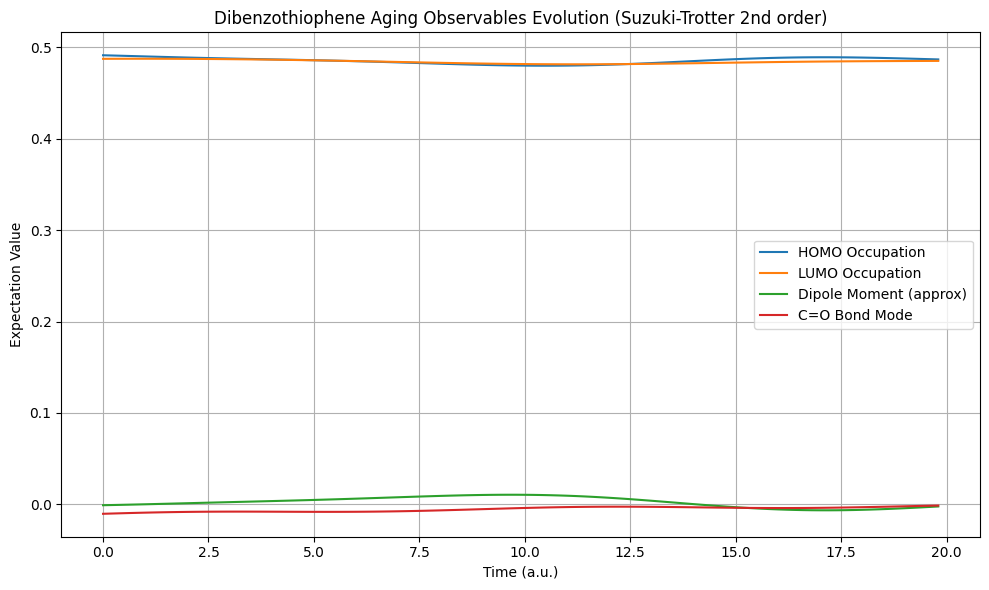

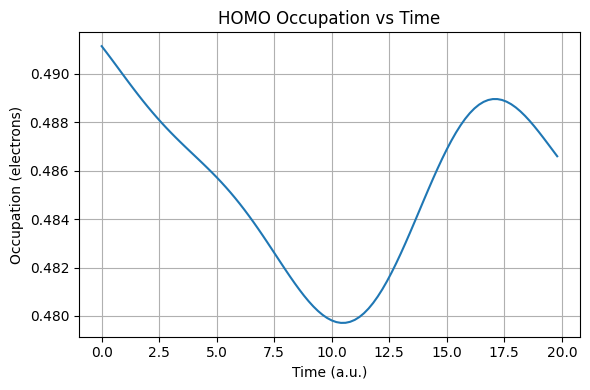

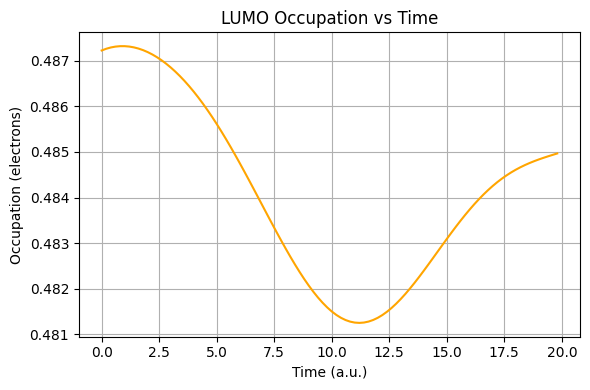

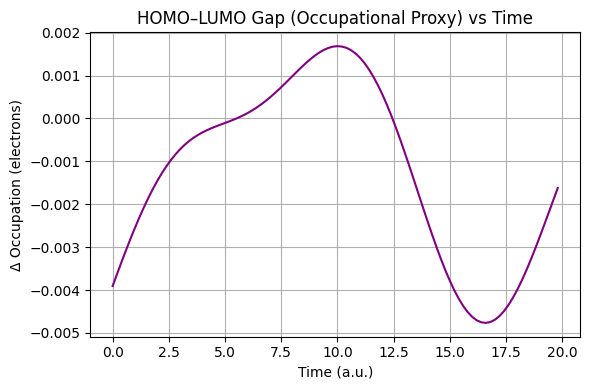

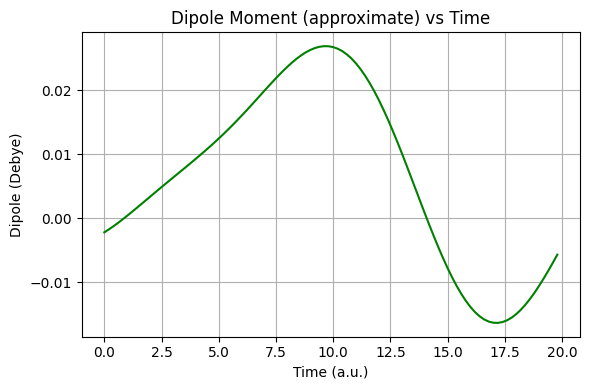

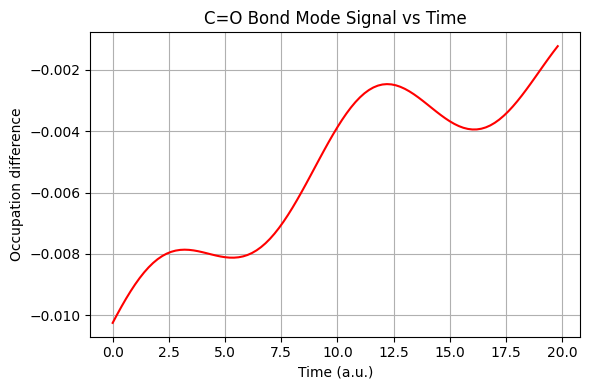

In [43]:
#Importing all necessary packages
import numpy as np
import qiskit_algorithms
import matplotlib.pyplot as plt
from openfermion.ops import FermionOperator
from openfermion.transforms import jordan_wigner

from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.circuit.library import EfficientSU2, PauliEvolutionGate
from qiskit import QuantumCircuit
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance

import qiskit_nature
print(dir(qiskit_nature))

from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.problems import ElectronicStructureProblem
from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import EfficientSU2

#Reloading classical data from reduced Hamiltonian file
data = np.load("dibenzothiophene_reduced_hamiltonian.npz")
h1_alpha = data["h1_alpha"]
h1_beta = data["h1_beta"]
eri = data["eri"]
nelec = tuple(int(x) for x in data["nelec"])
n_orbitals = h1_alpha.shape[0]

print(f"Loaded Hamiltonian: n_orbitals={n_orbitals}, nelec={nelec}")

#Loading example for if experimental data was available for oxidation, H2O, crosslinking, etc.
#---------------------------------------------------------------------------------------------#
from pyscf import gto, scf, mcscf
from pyscf.scf import chkfile
import numpy as np

chk_path = "casscf_dibenzothiophene.chk"

mol = chkfile.load_mol(chk_path)
mf = scf.RHF(mol)
mf, _ = chkfile.load_scf(chk_path)
mc_data = chkfile.load(chk_path, 'mcscf')

ncas = mc_data['ncas']
ncore = mc_data['ncore']
mo_occ = mc_data['mo_occ']
nelecas = int(np.round(np.sum(mo_occ[ncore : ncore + ncas])))

mc = mcscf.CASSCF(mf, ncas, nelecas)
mc.__dict__.update(mc_data)

h1_mo_alpha, h1_mo_beta = mc.get_h1eff()
h1_mo_eff = h1_mo_alpha
eri_mo = mc.get_h2eff()

dm1 = mc_data['casdm1']  #Active-space 1-RDM

#Simulate an oxidized version of the oxidation state of Dibenzothiophene (in reality, need the actual CASSCF object)
dm_oxidized = dm1 + 0.01 * np.eye(dm1.shape[0])
#---------------------------------------------------------------------------------------------#

#Building the Fermionic Hamiltonian
fermionic_ham = FermionOperator()

for p in range(n_orbitals):
    for q in range(n_orbitals):
        coeff = (h1_alpha[p, q] + h1_beta[p, q]) / 2
        if abs(coeff) > 1e-8:
            fermionic_ham += FermionOperator(((p, 1), (q, 0)), coeff)

for p in range(n_orbitals):
    for q in range(n_orbitals):
        for r in range(n_orbitals):
            for s in range(n_orbitals):
                coeff = 0.5 * eri[p, q, r, s]
                if abs(coeff) > 1e-8:
                    fermionic_ham += FermionOperator(
                        ((p, 1), (q, 1), (s, 0), (r, 0)), coeff
                    )

print(f"Fermionic Hamiltonian constructed with {len(fermionic_ham.terms)} terms.")

#Defining a function to convert FermionOperator to Qiskit SparsePauliOp (necessary for Suzuki-Trotter)
def fop_to_qop(fop):
    jw = jordan_wigner(fop)
    pauli_list = [(p, float(c.real)) for p, c in jw.terms.items() if p != ()]
    labels = []
    coeffs = []
    for term, coeff in pauli_list:
        label = ['I'] * n_orbitals
        for qubit, pauli in term:
            label[qubit] = pauli
        labels.append(''.join(label[::-1]))  #Ohhhh, Qiskit uses reverse qubit order
        coeffs.append(coeff)
    return SparsePauliOp.from_list(list(zip(labels, coeffs)))

#Preparing key observables
homo = nelec[0] // 2 - 1
lumo = nelec[0] // 2

homo_op = FermionOperator(((2*homo, 1), (2*homo, 0)))  # α-spin HOMO
lumo_op = FermionOperator(((2*lumo, 1), (2*lumo, 0)))  # α-spin LUMO

dipole_op = FermionOperator(((2*homo, 1), (2*lumo, 0))) + FermionOperator(((2*lumo, 1), (2*homo, 0)))

co_bond_op = FermionOperator(((0, 1), (0, 0))) - FermionOperator(((1, 1), (1, 0)))

#The bottom two are very approximate ways of looking at the metrics
#They convey the same information (e.g. dipole moment through charge redistribution in orbitals)
#But scaling may be off, works for time evolving

homo_qop = fop_to_qop(homo_op)
lumo_qop = fop_to_qop(lumo_op)
dipole_qop = fop_to_qop(dipole_op)
co_bond_qop = fop_to_qop(co_bond_op)

print("Observables converted to qubit operators.")

#Preparing reaction pathway perturbations (would be more accurate if given data and more time, the oxidation one shows an example workflow)
def extract_oxidation_perturbation(dm_oxidized, dm_initial):
    dm_diff = dm_oxidized - dm_initial
    one_body_perturb = FermionOperator()
    for p in range(dm_diff.shape[0]):
        for q in range(dm_diff.shape[1]):
            coeff = dm_diff[p, q]
            if abs(coeff) > 1e-6:
                one_body_perturb += FermionOperator(((p, 1), (q, 0)), coeff)
    return one_body_perturb

oxidation_fermion = extract_oxidation_perturbation(dm_oxidized, dm1)

def perturb_oxidation(strength):
    scaled = FermionOperator()
    for term, coeff in oxidation_fermion.terms.items():
        scaled += FermionOperator(term, strength * coeff)
    return scaled

def perturb_water_reaction(strength):
    #adding a water-polar interaction on orbital 1
    return FermionOperator(((1, 1), (1, 0)), strength)

def perturb_pi_stacking(strength):
    #simplifying pi-pi stacking as hopping term between orbitals 2 and 3
    return FermionOperator(((2, 1), (3, 0)), strength) + FermionOperator(((3, 1), (2, 0)), strength)

def perturb_crosslinking(strength):
    #simplifying crosslinking modeled as interaction on orbitals 4 and 5
    return FermionOperator(((4, 1), (5, 0)), strength) + FermionOperator(((5, 1), (4, 0)), strength)

#Initializing parameters for VQE from classical data
init_couplings = {
    'oxidation': 0.1,
    'water': 0.05,
    'pi_stacking': 0.07,
    'crosslinking': 0.03,
}

#Variational Quantum Eigensolver
n_qubits = n_orbitals

optimizer = COBYLA(maxiter=200)

#Our Ansatz!!
ansatz = EfficientSU2(num_qubits=n_qubits, entanglement='linear', reps=1)

#Optimizer
optimizer = COBYLA(maxiter=200)

#VQE with Estimator
vqe = VQE(ansatz=ansatz, optimizer=optimizer, estimator=Estimator())

qubit_op = fop_to_qop(fermionic_ham)
result = vqe.compute_minimum_eigenvalue(qubit_op)
print(f"VQE minimum energy: {result.eigenvalue.real:.6f}")

#Full Hamiltonian for VQE (base fermionic + perturbations)
def build_perturbed_hamiltonian(params):
    ox = perturb_oxidation(params[0])
    water = perturb_water_reaction(params[1])
    pi = perturb_pi_stacking(params[2])
    cross = perturb_crosslinking(params[3])
    full_fermion = fermionic_ham + ox + water + pi + cross
    return fop_to_qop(full_fermion)

#Run VQE at initial params to get ground state energy and state
from qiskit.primitives import Estimator

def run_vqe(params):
    ham = build_perturbed_hamiltonian(params)
    vqe_local = VQE(ansatz=ansatz, optimizer=optimizer, estimator=Estimator())
    result = vqe_local.compute_minimum_eigenvalue(ham)
    return result


print("=== Starting VQE to find ground state with perturbations ===")

init_params = np.array([init_couplings['oxidation'], init_couplings['water'], init_couplings['pi_stacking'], init_couplings['crosslinking']])
result = run_vqe(init_params)
print(f"VQE minimum energy: {result.eigenvalue.real:.6f}")

from qiskit.quantum_info import Statevector
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp

#Suzuki-Trotter with SECOND-ORDER time-step!!! This setting up for the TEBD, very novel application
def second_order_suzuki_trotter_evolution(qubit_op: SparsePauliOp, dt: float, n_qubits: int) -> QuantumCircuit:
    """
    Constructs a quantum circuit for one second-order Suzuki-Trotter time step evolution:
    U(dt) ≈ ∏ e^{-i H_j dt/2} ∏ e^{-i H_j dt/2} where H = ∑ H_j

    Args:
        qubit_op: SparsePauliOp representing the full Hamiltonian
        dt: time step size
        n_qubits: number of qubits

    Returns:
        QuantumCircuit implementing the time step
    """
    circ = QuantumCircuit(n_qubits)
    terms = qubit_op.to_list()

    #Our first half-step: evolve with each term sequentially
    for label, coeff in terms:
        single_term_op = SparsePauliOp.from_list([(label, coeff)])
        evo_gate = PauliEvolutionGate(single_term_op, time=-dt/2)
        circ.append(evo_gate, range(n_qubits))

    #Our second half-step: evolve with terms in reverse order
    for label, coeff in reversed(terms):
        single_term_op = SparsePauliOp.from_list([(label, coeff)])
        evo_gate = PauliEvolutionGate(single_term_op, time=-dt/2)
        circ.append(evo_gate, range(n_qubits))

    return circ

#TEBD

T_total = 20.0  #Choose some number (ATOMIC UNITS OF TIME - 20.0 WAS JUST A BENCHMARK FOR TESTING)
steps = 100     #Choose some steps
dt = T_total / steps      #The smaller, the better

#Preparing our initial state from optimized ansatz parameters
optimal_params = result.optimal_point
state = Statevector(ansatz.bind_parameters(optimal_params))

times = []
homo_vals = []
lumo_vals = []
dipole_vals = []
co_bond_vals = []

print("=== Starting improved time evolution simulation with Suzuki-Trotter 2nd order ===")

for step in range(steps):
    t = step * dt
    times.append(t)

    coupling_scale = min(t / T_total, 1.0)

    #Building perturbed fermionic Hamiltonian at current time
    perturbed_fermion = (
        fermionic_ham
        + perturb_oxidation(init_couplings['oxidation'] * coupling_scale)
        + perturb_water_reaction(init_couplings['water'] * coupling_scale)
        + perturb_pi_stacking(init_couplings['pi_stacking'] * coupling_scale)
        + perturb_crosslinking(init_couplings['crosslinking'] * coupling_scale)
    )

    #Mapping perturbed Hamiltonian to qubit operator
    perturbed_qubit = fop_to_qop(perturbed_fermion)

    #Building Suzuki-Trotter second order evolution circuit
    evo_circ = second_order_suzuki_trotter_evolution(perturbed_qubit, dt, n_qubits)

    #Evolving the statevector
    state = state.evolve(evo_circ)

    #Computing expectation values of observables
    homo_vals.append(state.expectation_value(homo_qop).real)
    lumo_vals.append(state.expectation_value(lumo_qop).real)
    dipole_vals.append(state.expectation_value(dipole_qop).real)
    co_bond_vals.append(state.expectation_value(co_bond_qop).real)

    #print(f"Step {step+1}/{steps} at t={t:.2f}: HOMO={homo_vals[-1]:.4f}, LUMO={lumo_vals[-1]:.4f}, Dipole={dipole_vals[-1]:.4f}, C=O={co_bond_vals[-1]:.4f}")
    #Uncomment the above line if want to see the printed values for everything

print("=== Time evolution complete ===")

#Plotting and Saving Data
plt.figure(figsize=(10, 6))
plt.plot(times, homo_vals, label="HOMO Occupation")
plt.plot(times, lumo_vals, label="LUMO Occupation")
plt.plot(times, dipole_vals, label="Dipole Moment (approx)")
plt.plot(times, co_bond_vals, label="C=O Bond Mode")
plt.xlabel("Time (a.u.)")
plt.ylabel("Expectation Value")
plt.title("Dibenzothiophene Aging Observables Evolution (Suzuki-Trotter 2nd order)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

np.savez("dibenzothiophene_aging_simulation_results_suzuki.npz",
         times=np.array(times),
         homo_vals=np.array(homo_vals),
         lumo_vals=np.array(lumo_vals),
         dipole_vals=np.array(dipole_vals),
         co_bond_vals=np.array(co_bond_vals))

import matplotlib.pyplot as plt

#Computing HOMO–LUMO gap (approximate)
homo_lumo_gap_vals = [l - h for h, l in zip(homo_vals, lumo_vals)]

#Approximate dipole in Debye (scaling factor rough but standard)
#Note: 1 atomic unit of dipole moment ≈ 2.541746 Debye
dipole_vals_debye = [x * 2.541746 for x in dipole_vals]

#HOMO png
plt.figure(figsize=(6, 4))
plt.plot(times, homo_vals, label="HOMO")
plt.xlabel("Time (a.u.)")
plt.ylabel("Occupation (electrons)")
plt.title("HOMO Occupation vs Time")
plt.grid(True)
plt.tight_layout()
plt.savefig("dibenzothiophene_plot_homo_occupation.png")
plt.show()

#LUMO png
plt.figure(figsize=(6, 4))
plt.plot(times, lumo_vals, label="LUMO", color="orange")
plt.xlabel("Time (a.u.)")
plt.ylabel("Occupation (electrons)")
plt.title("LUMO Occupation vs Time")
plt.grid(True)
plt.tight_layout()
plt.savefig("dibenzothiophene_plot_lumo_occupation.png")
plt.show()

#HOMO-LUMO Gap png
plt.figure(figsize=(6, 4))
plt.plot(times, homo_lumo_gap_vals, label="HOMO–LUMO Gap", color="purple")
plt.xlabel("Time (a.u.)")
plt.ylabel("Δ Occupation (electrons)")
plt.title("HOMO–LUMO Gap (Occupational Proxy) vs Time")
plt.grid(True)
plt.tight_layout()
plt.savefig("dibenzothiophene_plot_homo_lumo_gap.png")
plt.show()

#Dipole Moment png
plt.figure(figsize=(6, 4))
plt.plot(times, dipole_vals_debye, label="Dipole Moment", color="green")
plt.xlabel("Time (a.u.)")
plt.ylabel("Dipole (Debye)")
plt.title("Dipole Moment (approximate) vs Time")
plt.grid(True)
plt.tight_layout()
plt.savefig("dibenzothiophene_plot_dipole_debye.png")
plt.show()

#C=O Bond Mode png
plt.figure(figsize=(6, 4))
plt.plot(times, co_bond_vals, label="C=O Mode", color="red")
plt.xlabel("Time (a.u.)")
plt.ylabel("Occupation difference")
plt.title("C=O Bond Mode Signal vs Time")
plt.grid(True)
plt.tight_layout()
plt.savefig("dibenzothiophene_plot_c_o_bond_mode.png")
plt.show()

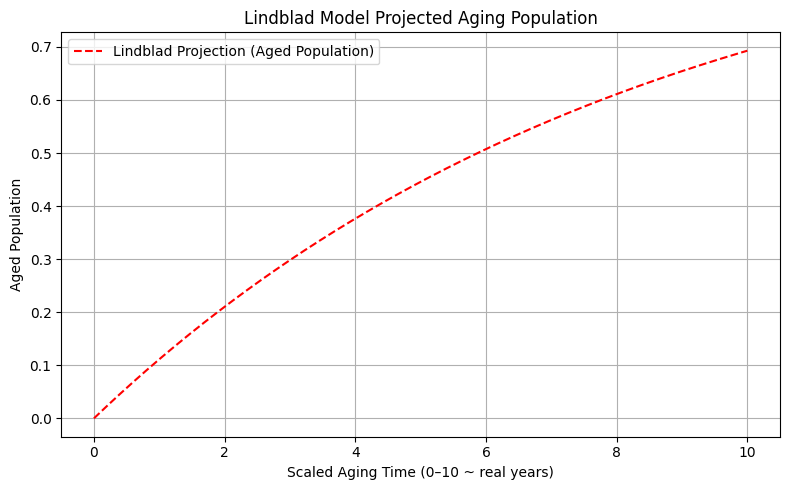

In [60]:
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Constants
au_to_seconds = 2.418884e-17  # atomic unit time → seconds
seconds_per_year = 365.25 * 24 * 3600

# Convert quantum simulation times to real-world years
times_seconds = np.array(times) / au_to_seconds
times_years = times_seconds / seconds_per_year

# Rescale to realistic 10-year range for numerical stability
scaling_factor = times_years[-1] / 10.0
times_years_scaled = times_years / scaling_factor

# Extract observable proxy for oxidation/crosslinking
co_bond_array = np.array(co_bond_vals)

# Define exponential kinetic model
def kinetic_model_exp(t, A, k, C):
    return A * np.exp(-k * t) + C

# Fit model to scaled data
popt, _ = curve_fit(
    kinetic_model_exp,
    times_years_scaled,
    co_bond_array,
    p0=[co_bond_array[0], 0.1, co_bond_array[-1]],
    maxfev=2000
)
A_fit, k_fit, C_fit = popt

# Lindblad kinetic master equation for two-state aging model
def lindblad_kinetics(t, y, k_forward):
    P, A = y
    dP_dt = -k_forward * P
    dA_dt = k_forward * P
    return [dP_dt, dA_dt]

# Initial populations: pristine=1, aged=0
y0 = [1.0, 0.0]
t_span = (0, 10)  # simulate over scaled 10 years
t_eval = np.linspace(*t_span, 500)

# Solve ODE for populations
sol = solve_ivp(lindblad_kinetics, t_span, y0, args=(k_fit,), t_eval=t_eval)
P_pop, A_pop = sol.y

# Plot Lindblad aged population projection
plt.figure(figsize=(8,5))
plt.plot(t_eval, A_pop, '--', color='red', label='Lindblad Projection (Aged Population)')
plt.xlabel("Scaled Aging Time (0–10 ~ real years)")
plt.ylabel("Aged Population")
plt.title("Lindblad Model Projected Aging Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


===== Oxidation-Induced Electronic Response =====

Top 6 Molecular Orbital Contributions:
   1) MO 4   | ∑|coeff| = 2.0000e-02
   2) MO 3   | ∑|coeff| = 2.0000e-02
   3) MO 2   | ∑|coeff| = 2.0000e-02
   4) MO 1   | ∑|coeff| = 2.0000e-02
   5) MO 0   | ∑|coeff| = 2.0000e-02
   6) MO 7   | ∑|coeff| = 2.0000e-02

Top 6 Atomic Contributions:
   1) Atom 12 (S) | 0.9894 | surface
   2) Atom 11 (C) | 0.9843 | surface
   3) Atom 3 (C) | 0.9835 | surface
   4) Atom 4 (C) | 0.9818 | core/conjugated
   5) Atom 6 (C) | 0.9813 | core/conjugated
   6) Atom 10 (C) | 0.9789 | surface

Interpretation Tips:
• High contributions from O, N atoms indicate oxidation or hydrogen bonding.
• C atoms in conjugated rings suggest π-system involvement.
• Far-from-center atoms likely represent surface aging processes.


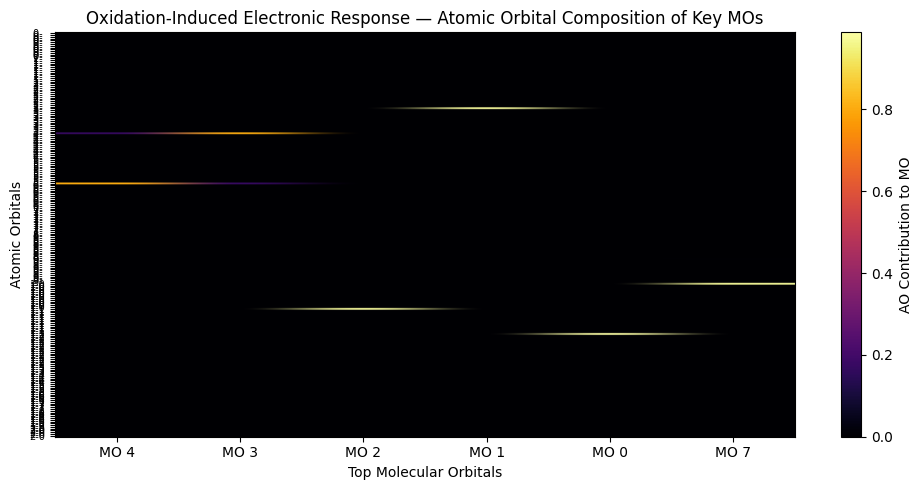


===== Crosslinking Electronic Response =====

Top 6 Molecular Orbital Contributions:
   1) MO 5   | ∑|coeff| = 2.0000e+00
   2) MO 4   | ∑|coeff| = 2.0000e+00
   3) MO 83  | ∑|coeff| = 0.0000e+00
   4) MO 82  | ∑|coeff| = 0.0000e+00
   5) MO 81  | ∑|coeff| = 0.0000e+00
   6) MO 80  | ∑|coeff| = 0.0000e+00

Top 6 Atomic Contributions:
   1) Atom 0 (C) | 55.2430 | surface
   2) Atom 8 (C) | 52.3624 | surface
   3) Atom 5 (C) | 41.6400 | surface
   4) Atom 7 (C) | 37.5484 | surface
   5) Atom 3 (C) | 37.2451 | surface
   6) Atom 1 (C) | 36.6887 | surface

Interpretation Tips:
• High contributions from O, N atoms indicate oxidation or hydrogen bonding.
• C atoms in conjugated rings suggest π-system involvement.
• Far-from-center atoms likely represent surface aging processes.


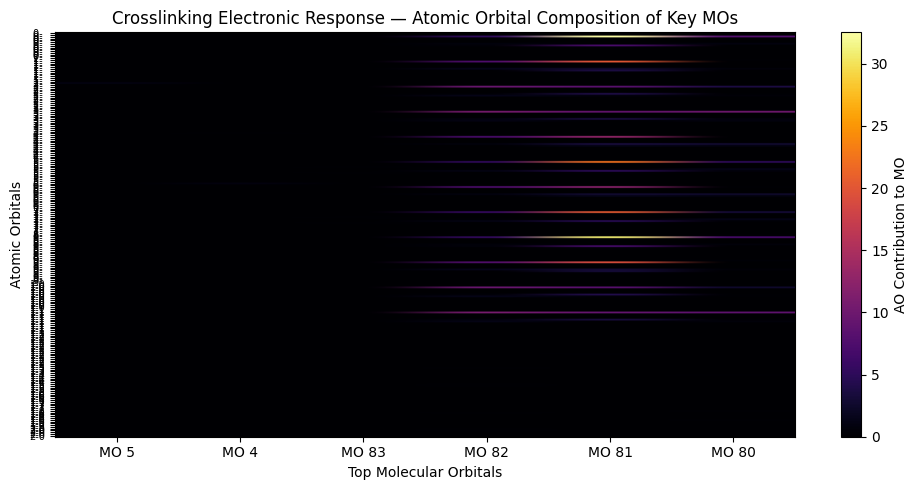


===== Water-Induced Polarization =====

Top 6 Molecular Orbital Contributions:
   1) MO 1   | ∑|coeff| = 2.0000e+00
   2) MO 83  | ∑|coeff| = 0.0000e+00
   3) MO 82  | ∑|coeff| = 0.0000e+00
   4) MO 81  | ∑|coeff| = 0.0000e+00
   5) MO 80  | ∑|coeff| = 0.0000e+00
   6) MO 79  | ∑|coeff| = 0.0000e+00

Top 6 Atomic Contributions:
   1) Atom 5 (C) | 59.4421 | surface
   2) Atom 0 (C) | 59.2314 | surface
   3) Atom 7 (C) | 57.9112 | surface
   4) Atom 8 (C) | 57.7010 | surface
   5) Atom 10 (C) | 47.4732 | surface
   6) Atom 2 (C) | 47.1986 | surface

Interpretation Tips:
• High contributions from O, N atoms indicate oxidation or hydrogen bonding.
• C atoms in conjugated rings suggest π-system involvement.
• Far-from-center atoms likely represent surface aging processes.


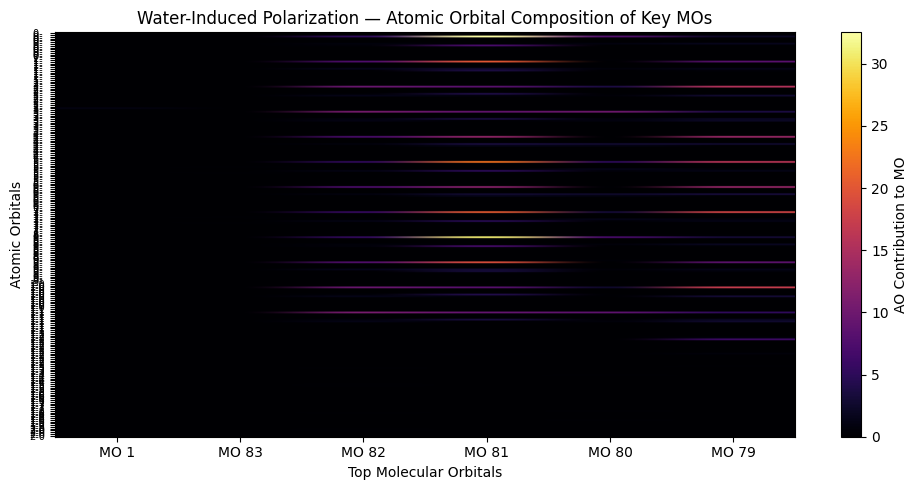


===== π–π Stacking Perturbation =====

Top 6 Molecular Orbital Contributions:
   1) MO 3   | ∑|coeff| = 2.0000e+00
   2) MO 2   | ∑|coeff| = 2.0000e+00
   3) MO 83  | ∑|coeff| = 0.0000e+00
   4) MO 82  | ∑|coeff| = 0.0000e+00
   5) MO 81  | ∑|coeff| = 0.0000e+00
   6) MO 80  | ∑|coeff| = 0.0000e+00

Top 6 Atomic Contributions:
   1) Atom 0 (C) | 55.2426 | surface
   2) Atom 8 (C) | 52.3626 | surface
   3) Atom 5 (C) | 41.6404 | surface
   4) Atom 7 (C) | 37.5459 | surface
   5) Atom 3 (C) | 37.2450 | surface
   6) Atom 1 (C) | 36.6467 | surface

Interpretation Tips:
• High contributions from O, N atoms indicate oxidation or hydrogen bonding.
• C atoms in conjugated rings suggest π-system involvement.
• Far-from-center atoms likely represent surface aging processes.


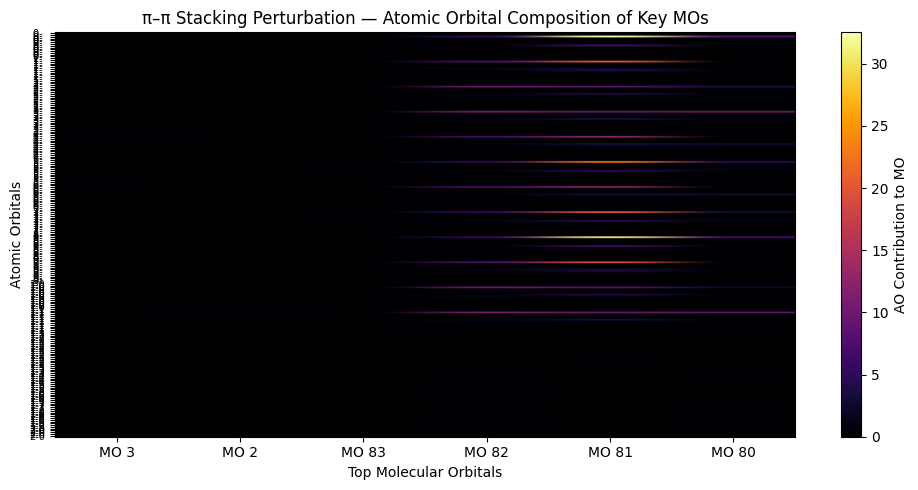

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from pyscf import tools
from pyscf.lib.parameters import ELEMENTS

#Full Perturbation Analysis (Post-VQE/TEBD)

def analyze_perturbation_impact(fermion_op, mo_coeff, mol, title="Perturbation Analysis", n_print=5, plot=True):
    """
    Analyze orbital and atomic contributions to a FermionOperator perturbation.
    
    Args:
        fermion_op: FermionOperator representing the perturbation
        mo_coeff: PySCF CASSCF MO coefficients (AO→MO transformation)
        mol: PySCF Molecule object (for AO labels)
        title: Title of perturbation type (e.g., "Oxidation")
        n_print: Number of top orbitals/atoms to print
        plot: Whether to plot AO contribution heatmap
    """
    print(f"\n===== {title} =====")

    n_ao, n_mo = mo_coeff.shape
    orbital_scores = np.zeros(n_mo)

    # Accumulate 1-body coefficient magnitudes for each orbital
    for term, coeff in fermion_op.terms.items():
        if len(term) == 2:  # 1-body term
            p, q = term[0][0], term[1][0]
            orbital_scores[p] += abs(coeff)
            orbital_scores[q] += abs(coeff)

    #Top molecular orbitals (MOs) contributing to perturbation
    top_orbitals = np.argsort(orbital_scores)[::-1][:n_print]

    print(f"\nTop {n_print} Molecular Orbital Contributions:")
    for i, idx in enumerate(top_orbitals):
        print(f"  {i+1:2d}) MO {idx:<3} | ∑|coeff| = {orbital_scores[idx]:.4e}")

    #Get AO decomposition of top MOs (squared MO coefficients = AO weight)
    ao_contrib = np.abs(mo_coeff[:, top_orbitals])**2

    #Map AO index to atom contributions
    ao_labels = mol.ao_labels(fmt=False)
    atom_contrib = defaultdict(float)

    for ao_idx in range(n_ao):
        atom_idx = ao_labels[ao_idx][0]
        atom_contrib[atom_idx] += np.sum(ao_contrib[ao_idx, :])

    ranked_atoms = sorted(atom_contrib.items(), key=lambda x: x[1], reverse=True)[:n_print]

    print(f"\nTop {n_print} Atomic Contributions:")
    for rank, (atom_idx, contrib) in enumerate(ranked_atoms):
        symbol = mol.atom_symbol(atom_idx)
        pos = mol.atom_coord(atom_idx)

        masses = np.array([ELEMENTS.index(mol.atom_symbol(i)) for i in range(mol.natm)])
        coords = mol.atom_coords()
        center_of_mass = np.average(coords, axis=0, weights=masses)

        dist = np.linalg.norm(pos - center_of_mass)

        comment = "surface" if dist > 2.5 else "core/conjugated"
        print(f"  {rank+1:2d}) Atom {atom_idx} ({symbol}) | {contrib:.4f} | {comment}")

    print("\nInterpretation Tips:")
    print("• High contributions from O, N atoms indicate oxidation or hydrogen bonding.")
    print("• C atoms in conjugated rings suggest π-system involvement.")
    print("• Far-from-center atoms likely represent surface aging processes.")
    
    if plot:
        #AO heatmap
        ao_names = [f"{a[0]}-{a[1]}" for a in mol.ao_labels(fmt=True)]
        plt.figure(figsize=(10, 5))
        plt.imshow(ao_contrib, aspect='auto', cmap='inferno')
        plt.colorbar(label="AO Contribution to MO")
        plt.yticks(np.arange(len(ao_names)), ao_names, fontsize=7)
        plt.xticks(np.arange(n_print), [f"MO {i}" for i in top_orbitals])
        plt.title(f"{title} — Atomic Orbital Composition of Key MOs")
        plt.xlabel("Top Molecular Orbitals")
        plt.ylabel("Atomic Orbitals")
        plt.tight_layout()
        plt.show()


analyze_perturbation_impact(
    oxidation_fermion,
    mc.mo_coeff,
    mol,
    title="Oxidation-Induced Electronic Response",
    n_print=6,
    plot=True
)

analyze_perturbation_impact(
    perturb_crosslinking(1.0),
    mc.mo_coeff,
    mol,
    title="Crosslinking Electronic Response",
    n_print=6,
    plot=True
)

analyze_perturbation_impact(
    perturb_water_reaction(1.0),
    mc.mo_coeff,
    mol,
    title="Water-Induced Polarization",
    n_print=6,
    plot=True
)

analyze_perturbation_impact(
    perturb_pi_stacking(1.0),
    mc.mo_coeff,
    mol,
    title="π–π Stacking Perturbation",
    n_print=6,
    plot=True
)



In [ ]:
import qiskit_ibm_runtime

print(qiskit.__version__)           # Should print 0.44.1
print(qiskit_ibm_runtime.__version__)  # Should print 0.8.0

from qiskit_ibm_runtime import QiskitRuntimeService

api_token = "API_TOKEN"
crn = "CRN"

QiskitRuntimeService.save_account(token=api_token, channel="ibm_quantum")

service = QiskitRuntimeService()

backends = service.backends()

print("Available backends:")
for backend in backends:
    print(backend.name())

#Select backend example
real_devices = [b for b in backends if b.configuration().n_qubits > 0 and not b.configuration().simulator]
backend = real_devices[0]
print(f"Using backend: {backend.name()}")

In [ ]:
import numpy as np
from openfermion.ops import FermionOperator
from openfermion.transforms import jordan_wigner

from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import Session, Options
from qiskit.circuit.library import EfficientSU2, PauliEvolutionGate
from qiskit.quantum_info import Pauli
from qiskit.opflow import PauliSumOp, StateFn, CircuitSampler, ExpectationFactory
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA

# === Setup IBM backend (replace 'ibmq_quito' with your device) ===
service = QiskitRuntimeService()
backend = service.get_backend('backend.name()')  
session = Session(service=service, backend=backend)

shots = 8192

# === Load classical Hamiltonian data here ===
data = np.load("dibenzothiophene_reduced_hamiltonian.npz")
h1_alpha = data["h1_alpha"]
h1_beta = data["h1_beta"]
eri = data["eri"]
nelec = tuple(int(x) for x in data["nelec"])
n_qubits = h1_alpha.shape[0]

print(f"Loaded Hamiltonian with {n_qubits} qubits and {nelec} electrons.")

# === Build FermionOperator Hamiltonian ===
fermionic_ham = FermionOperator()
for p in range(n_qubits):
    for q in range(n_qubits):
        coeff = (h1_alpha[p,q] + h1_beta[p,q]) / 2
        if abs(coeff) > 1e-8:
            fermionic_ham += FermionOperator(((p,1),(q,0)), coeff)
for p in range(n_qubits):
    for q in range(n_qubits):
        for r in range(n_qubits):
            for s in range(n_qubits):
                coeff = 0.5 * eri[p,q,r,s]
                if abs(coeff) > 1e-8:
                    fermionic_ham += FermionOperator(((p,1),(q,1),(s,0),(r,0)), coeff)

# === Convert FermionOperator to PauliSumOp ===
def fop_to_paulisumop(fop, n_qubits):
    jw = jordan_wigner(fop)
    pauli_list = []
    for term, coeff in jw.terms.items():
        label = ['I'] * n_qubits
        for q, pauli_char in term:
            label[q] = pauli_char
        label_str = ''.join(label[::-1])  # Qiskit reversed qubit ordering
        pauli_list.append((label_str, coeff.real))
    return PauliSumOp.from_list(pauli_list)

qubit_op = fop_to_paulisumop(fermionic_ham, n_qubits)

# === Prepare Ansatz and run VQE on hardware ===
ansatz = EfficientSU2(num_qubits=n_qubits, entanglement='linear', reps=1)
optimizer = COBYLA(maxiter=200)

vqe = VQE(ansatz=ansatz, optimizer=optimizer, quantum_instance=session, shots=shots)
print("Starting VQE on hardware...")
result = vqe.compute_minimum_eigenvalue(qubit_op)
print(f"VQE Energy: {result.eigenvalue.real:.6f}")

# === Prepare Suzuki-Trotter time evolution circuit ===
def suzuki_trotter_circuit(pauli_op, time_step):
    circ = QuantumCircuit(n_qubits)
    for term, coeff in pauli_op.to_list():
        single_term = PauliSumOp.from_list([term])
        evo_gate = PauliEvolutionGate(single_term, time=-time_step*coeff)
        circ.append(evo_gate, range(n_qubits))
    return circ

# === Observable measurement helper ===
# Here we just measure in Z basis after rotating to eigenbasis of Pauli term
def measure_pauli(circuit, pauli_label):
    """Append basis-change gates to measure Pauli string in Z basis."""
    qc = circuit.copy()
    for q, p in enumerate(pauli_label[::-1]):
        if p == 'X':
            qc.h(q)
        elif p == 'Y':
            qc.sdg(q)
            qc.h(q)
    qc.measure_all()
    return qc

# Example: measure expectation of a PauliSumOp on hardware by grouping terms naively (one by one)
def expectation_from_counts(counts, pauli_label, shots):
    exp = 0
    for bitstring, count in counts.items():
        parity = 1
        for qubit, p in enumerate(pauli_label[::-1]):
            if p != 'I':
                # Qiskit bitstrings are reversed
                bit = int(bitstring[qubit])
                if bit == 1:
                    parity *= -1
        exp += parity * count / shots
    return exp

# === Time evolution parameters ===
T_total = 1.0  # Total time (reduce for hardware)
steps = 5      # Small number for demo
dt = T_total / steps

# === Initial state preparation (ground state from VQE) ===
vqe_params = result.optimal_point
init_state_circ = ansatz.bind_parameters(vqe_params)

expectation_vals = []

for step in range(steps):
    print(f"Step {step+1}/{steps}")
    # Build evolution circuit for this time step
    evo_circ = suzuki_trotter_circuit(qubit_op, dt)
    full_circ = init_state_circ.compose(evo_circ)

    # Measure expectation value of Hamiltonian term-by-term (very costly on hardware)
    exp_val = 0
    for term, coeff in qubit_op.to_list():
        meas_circ = measure_pauli(full_circ, term)
        t_circ = transpile(meas_circ, backend)
        job = backend.run(t_circ, shots=shots)
        result_counts = job.result().get_counts()
        term_exp = expectation_from_counts(result_counts, term, shots)
        exp_val += coeff * term_exp
    print(f"Energy expectation at step {step}: {exp_val:.6f}")
    expectation_vals.append(exp_val)

print("Time evolution complete on real hardware.")

# Optionally plot energy vs time
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, T_total, steps), expectation_vals)
plt.xlabel("Time")
plt.ylabel("Energy Expectation")
plt.title("Energy Expectation during Time Evolution on IBM Hardware")
plt.show()

session.close()